In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
deliveries = pd.read_csv('data/deliveries_2024.csv')
matches = pd.read_csv('data/matches_2024.csv')

# Show all columns
pd.set_option('display.max_columns', None)

In [3]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Data Cleaning --- matches dataset

In [6]:
# Column ----->>>> matches['id']
# Rename the 'id' column to 'match_id' of matches dataset
matches.rename(columns={'id':'match_id'}, inplace=True)

In [7]:
# Column ----->>>> matches['season']

matches['season'] = matches['season'].replace({'2007/08':'2008', '2009/10':'2010','2020/21':'2020'})
matches['season']=matches['season'].astype(int)     # Dtype to --->>>>> int32

In [8]:
# Column ----->>>> matches['city'] --> Standardized City Name

standardized_city_name = {
                            "Bangalore": "Bengaluru",
                            "Mohali": "Chandigarh",
                            "Navi Mumbai": "Mumbai"
                        }
matches['city'] = matches['city'].replace(standardized_city_name)

In [9]:
# Column ----->>>> matches['city'] -----> Missing Value handle

matches.loc[matches['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'
matches.loc[matches['venue'] == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'

In [10]:
# Column ----->>>> matches['date'] ---->>>> changa Dtype to datetime
matches['date'] = pd.to_datetime(matches['date'])

In [11]:
# Column ----->>>>matches['player_of_match']

matches['player_of_match'] = matches['player_of_match'].fillna('Match Abandoned')   # NaN fill with "Match Abandoned"

In [12]:
# Column ----->>>> matches['venue']
standardized_venue ={
    "Arun Jaitley Stadium, Delhi": "Arun Jaitley Stadium",
    "Brabourne Stadium, Mumbai": "Brabourne Stadium",
    "Dr DY Patil Sports Academy, Mumbai": "Dr DY Patil Sports Academy",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam": "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",
    "Eden Gardens, Kolkata": "Eden Gardens",
    "Feroz Shah Kotla": "Arun Jaitley Stadium",  # old name
    "M Chinnaswamy Stadium, Bengaluru": "M Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk, Chennai": "MA Chidambaram Stadium",
    "Maharashtra Cricket Association Stadium, Pune": "Maharashtra Cricket Association Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium",
    "Rajiv Gandhi International Stadium, Uppal, Hyderabad": "Rajiv Gandhi International Stadium",
    "Sawai Mansingh Stadium, Jaipur": "Sawai Mansingh Stadium",
    "Wankhede Stadium, Mumbai": "Wankhede Stadium",
    "Zayed Cricket Stadium, Abu Dhabi": "Sheikh Zayed Stadium",
    "Sardar Patel Stadium, Motera": "Narendra Modi Stadium, Ahmedabad",
    "Himachal Pradesh Cricket Association Stadium, Dharamsala":"Himachal Pradesh Cricket Association Stadium"
}

matches['venue'] = matches['venue'].replace(standardized_venue)

In [13]:
# Column ----->>>> matches['team1'], matches['team2'], matches['toss_winner'], matches['winner']
# Change of the IPL team names

team_name_changed= {
                    'Delhi Daredevils':'Delhi Capitals',
                    'Kings XI Punjab':'Punjab Kings',
                    'Deccan Chargers':'Sunrisers Hyderabad',
                    'Rising Pune Supergiants':'Rising Pune Supergiant',
                    'Royal Challengers Bangalore':'Royal Challengers Bengaluru'
                }

matches['team1'] = matches['team1'].replace(team_name_changed)
matches['team2'] = matches['team2'].replace(team_name_changed)
matches['toss_winner']= matches['toss_winner'].replace(team_name_changed)
matches['winner'] = matches['winner'].replace(team_name_changed)


In [14]:
# Column ----->>>> matches['winner']
matches['winner'] = matches['winner'].fillna('Match Abandoned')   # NaN fill with "Match Abandoned"

In [15]:
# Column ----->>>> matches['result']
matches['result'] = matches['result'].replace({'no result': 'Match Abandoned'})

In [16]:
# Column ----->>>> matches['result_margin']
matches['result_margin'] = matches['result_margin'].astype(object)
matches.loc[matches['result']=='tie','result_margin'] = 'Match Tied'
matches.loc[matches['result']=='Match Abandoned','result_margin'] = 'Match Abandoned'


In [17]:
# Column ----->>>> matches['method'] 
matches['method'] = matches['method'].fillna('Normal')  # NaN fill with "Normal"

### Data Cleaning --- deliveries dataset

In [19]:
# Column ----->>>> deliveries['batting_team'], deliveries['bowling_team']
# Change of the IPL team names

team_name_changed= {
                    'Delhi Daredevils':'Delhi Capitals',
                    'Kings XI Punjab':'Punjab Kings',
                    'Deccan Chargers':'Sunrisers Hyderabad',
                    'Rising Pune Supergiants':'Rising Pune Supergiant',
                    'Royal Challengers Bangalore':'Royal Challengers Bengaluru'
                }

deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_changed)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_changed)

In [20]:
# Column ----->>>> deliveries['extras_type']
deliveries['extras_type'] = deliveries['extras_type'].fillna(0)


### Feature Engineering

In [22]:
# Add a new column: matches['oppenent']
matches['opponent'] = matches.apply(
    lambda row: (
        row['team2'] if row['team1']== row['winner'] 
        else row['team1'] if row['team2']== row['winner']
        else 'Match Abandoned'
        ), axis =1
    )

In [23]:
# Add matches['season'] column into ----> deliveries

deliveries = matches[['match_id','season']].merge(deliveries, how='left', on='match_id')

### Save clean datasets

In [25]:
matches.to_csv('data/matches_clean_data.csv')
deliveries.to_csv('data/deliveries_clean_data.csv')

In [26]:
matches.head(4)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,opponent
0,335982,2008,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen,Royal Challengers Bengaluru
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri,Punjab Kings
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar,Rajasthan Royals
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper,Mumbai Indians


In [27]:
deliveries.head(4)

,match_id,season,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0,0,NaN,NaN,NaN
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0,0,NaN,NaN,NaN


## EDA

### Success Rate of Teams ---- > all seasons

In [30]:
# Function to find the success rate of any team
def success_ratio_func(team_name):
    total_match_played = matches[matches['team1']== team_name].shape[0] + matches[matches['team2']==team_name].shape[0]
    total_win = matches[matches['winner'] == team_name].shape[0]
    sucess_ratio = round((total_win/total_match_played) * 100,2)
    return sucess_ratio

In [31]:
# Combine both columns and get unique values
all_teams = pd.unique(matches[['team1', 'team2']].values.ravel())
all_teams

array(['Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Punjab Kings', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [32]:
# Making list of all teams success rate
success_rate_all_teams = []
for i in (all_teams):
    rate = success_ratio_func(i)
    success_rate_all_teams.append(rate)

# Dataframe of success_rate_all_teams 
df_success_rate_all_teams = pd.DataFrame({
    'team_name': all_teams,
    'success_rate': success_rate_all_teams
}) 


In [33]:
# Arange decending order
df_success_rate_all_teams = df_success_rate_all_teams.sort_values('team_name').reset_index(drop=True)

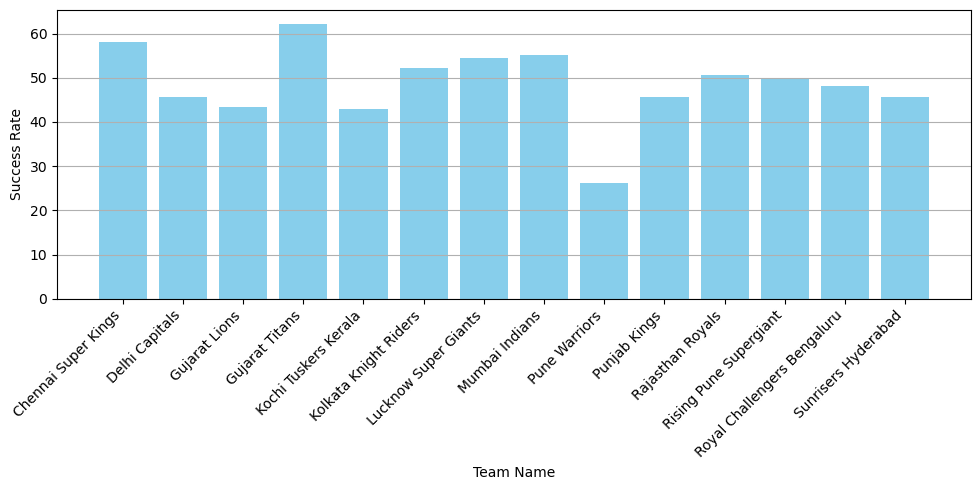

In [34]:
plt.figure(figsize=(10,5))
plt.bar(df_success_rate_all_teams['team_name'],df_success_rate_all_teams['success_rate'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team Name')
plt.ylabel('Success Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Success Rate of Teams ---- > all seasons ----> accumulated

In [36]:
# Function to find the success rate of any team
def success_ratio_func(team_name):
    total_match_played = matches[matches['team1']== team_name].shape[0] + matches[matches['team2']==team_name].shape[0]
    total_win = matches[matches['winner'] == team_name].shape[0]
    sucess_ratio = round((total_win/total_match_played) * 100,2)
    return sucess_ratio

def success_ratio_graph():
    # Combine both columns and get unique values
    all_teams = pd.unique(matches[['team1', 'team2']].values.ravel())
    # Making list of all teams success rate
    success_rate_all_teams = []
    for i in (all_teams):
        rate = success_ratio_func(i)
        success_rate_all_teams.append(rate)

    # Dataframe of success_rate_all_teams 
    df_success_rate_all_teams = pd.DataFrame({
        'team_name': all_teams,
        'success_rate': success_rate_all_teams
    }) 
    # Arange decending order
    df_success_rate_all_teams = df_success_rate_all_teams.sort_values('team_name').reset_index(drop=True)
    
    # Bar chart
    plt.figure(figsize=(10,5))
    plt.bar(df_success_rate_all_teams['team_name'],df_success_rate_all_teams['success_rate'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Team Name')
    plt.ylabel('Success Rate')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


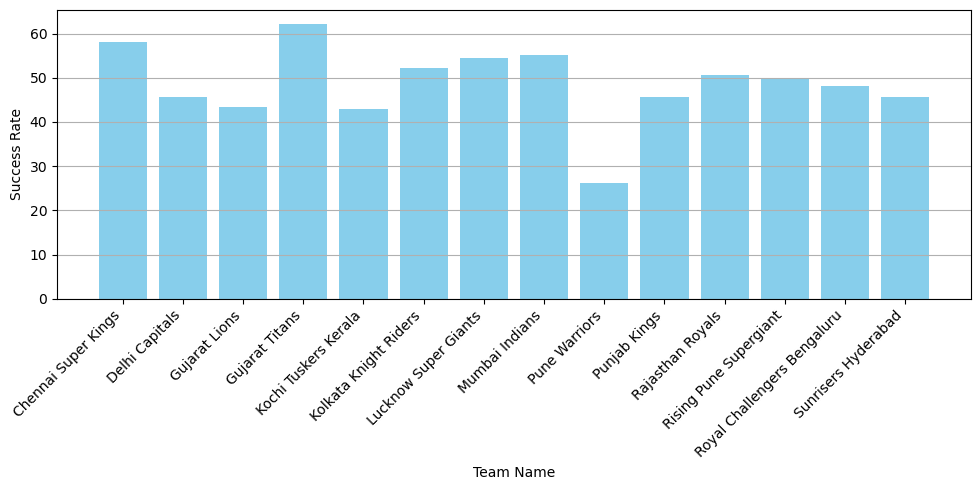

In [37]:
success_ratio_graph()

### Success Rate of Teams ---- > seasonswise

In [39]:


# Function to find the success rate of any team
def success_ratio_func_season(team_name):
    total_match_played = matches_season[matches_season['team1']== team_name].shape[0] + matches_season[matches_season['team2']==team_name].shape[0]
    total_win = matches_season[matches_season['winner'] == team_name].shape[0]
    success_ratio = round((total_win/total_match_played) * 100,2)
    return success_ratio

def success_ratio_graph_season(matches_season):
    
    # Combine both columns and get unique values
    all_teams = pd.unique(matches_season[['team1', 'team2']].values.ravel())
    # Making list of all teams success rate
    success_rate_all_teams = []
    for i in (all_teams):
        rate = success_ratio_func_season(i)
        success_rate_all_teams.append(rate)

    # Dataframe of success_rate_all_teams 
    df_success_rate_all_teams = pd.DataFrame({
        'team_name': all_teams,
        'success_rate': success_rate_all_teams
    }) 
    # Arange alphabetical order
    df_success_rate_all_teams = df_success_rate_all_teams.sort_values('team_name').reset_index(drop=True)
    
    # Bar chart
    plt.figure(figsize=(10,5))
    plt.bar(df_success_rate_all_teams['team_name'],df_success_rate_all_teams['success_rate'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Success Rate of IPL Teams {season_selected}')
    plt.xlabel('Team Name')
    plt.ylabel('Success Rate')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

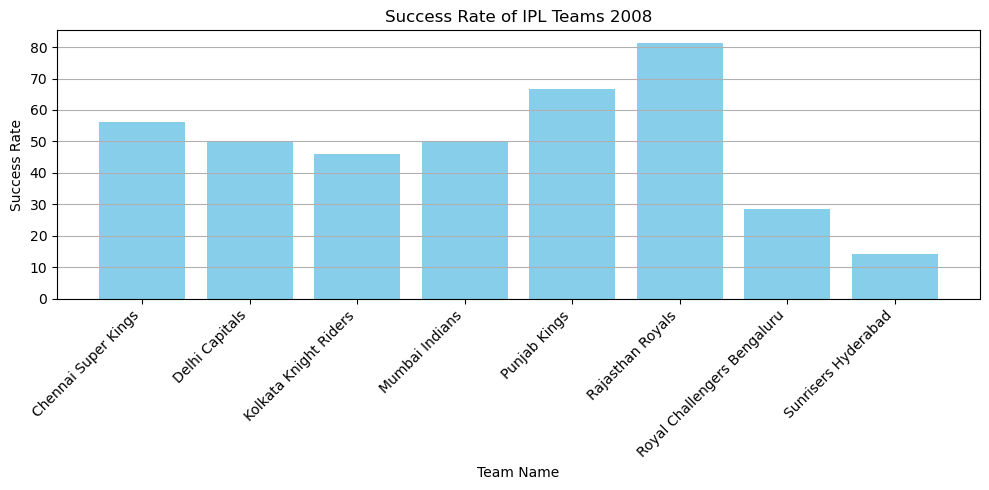

In [40]:
# matches_season
season_selected = 2008
matches_season = matches[matches['season']==season_selected]
success_ratio_graph_season(matches_season)

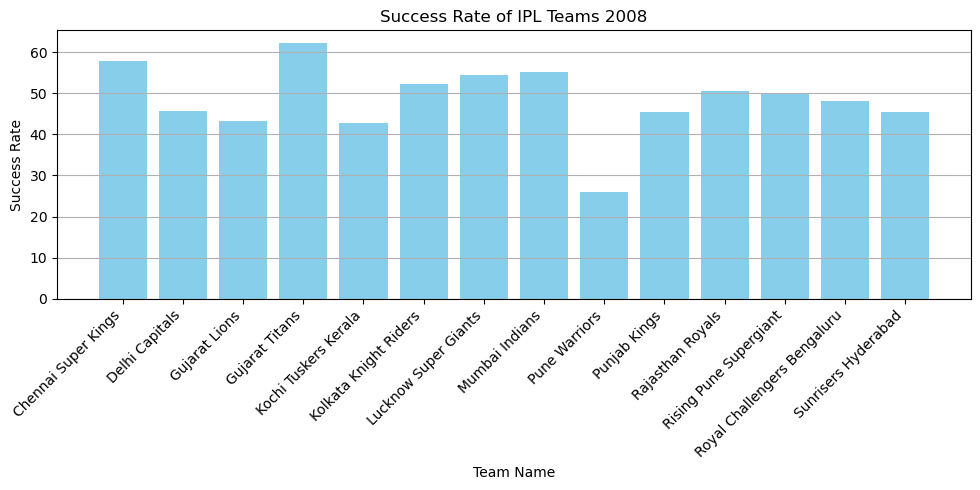

In [41]:
# matches_season
season_selected = 2008
matches_season = matches
success_ratio_graph_season(matches)